In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.DataFrame(pd.read_csv("diabetes.csv"))

In [3]:
df.head()   

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

count tells us the number of NoN-empty rows in a feature.

mean tells us the mean value of that feature.

std tells us the Standard Deviation Value of that feature.

min tells us the minimum value of that feature.

25%, 50%, and 75% are the percentile/quartile of each features. This quartile

information helps us to detect Outliers.

max tells us the maximum value of that feature.

In [5]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [7]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Exploratory Data Analysis

In [8]:
df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


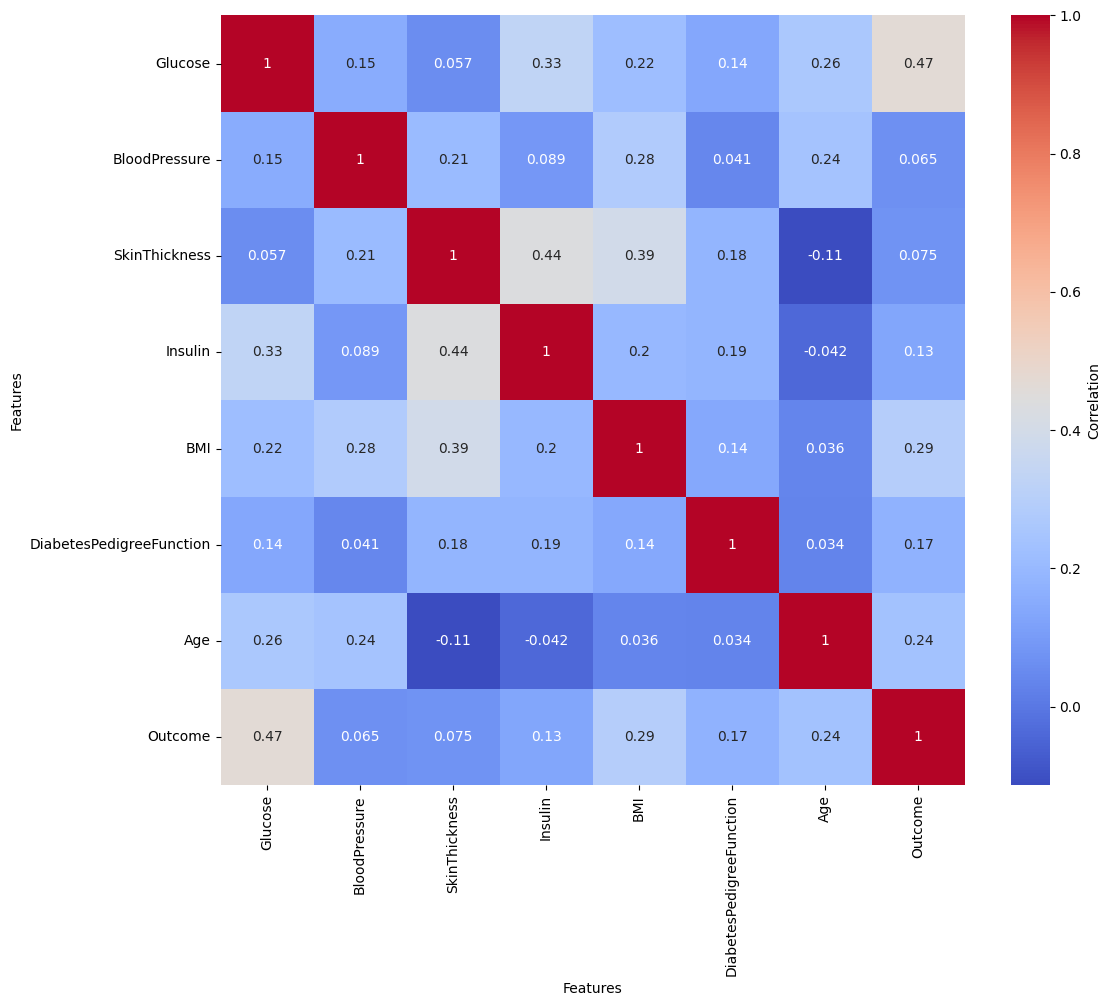

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

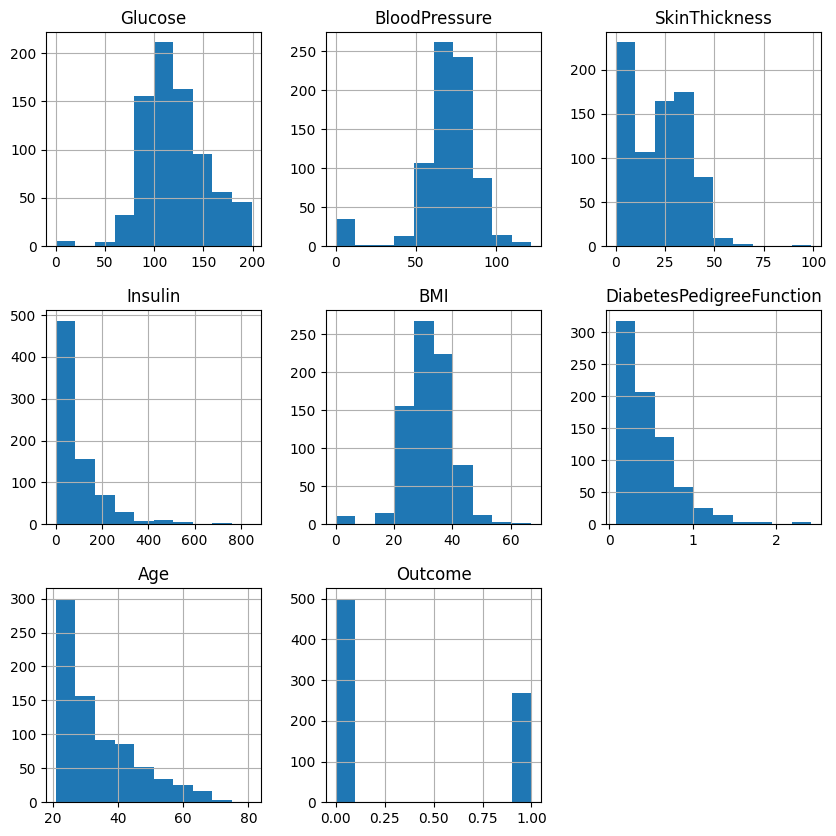

In [10]:
df.hist(figsize=(10, 10))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

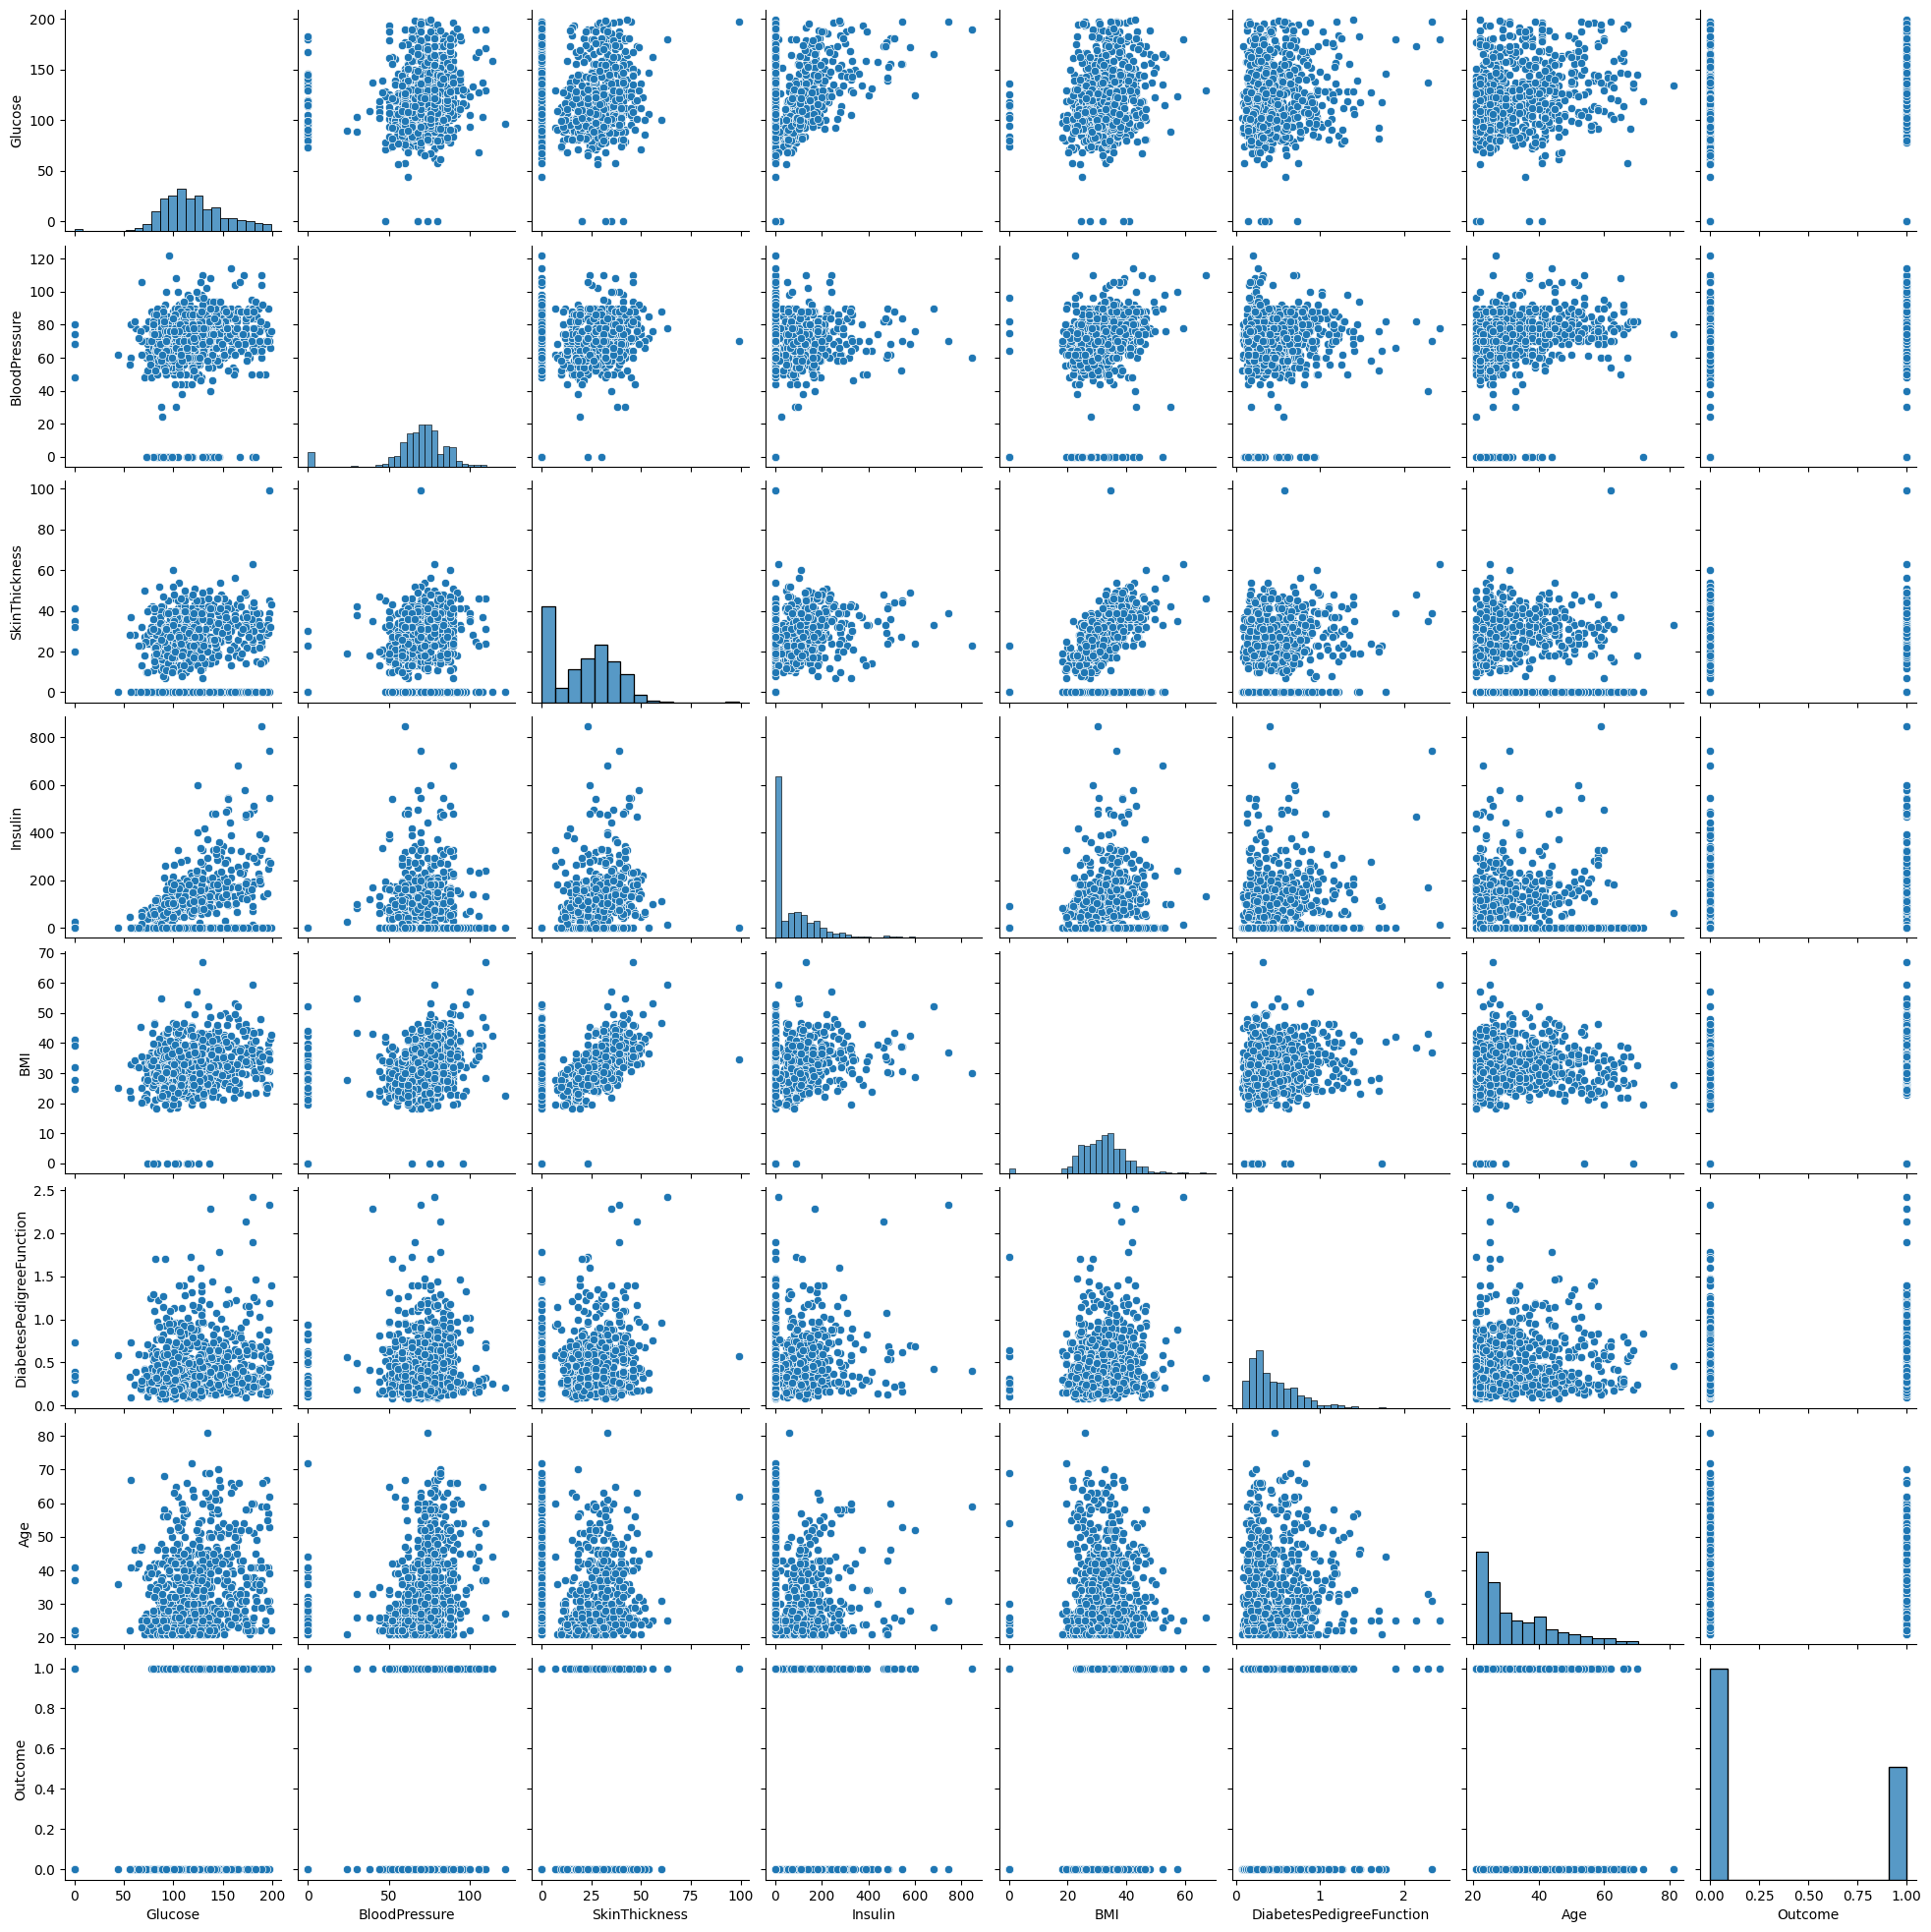

In [11]:
sns.pairplot(df, palette='Accent')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

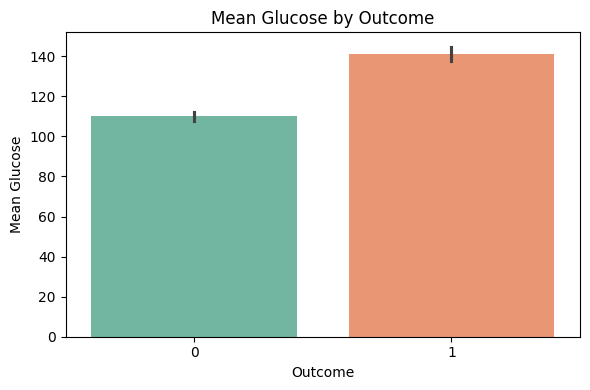

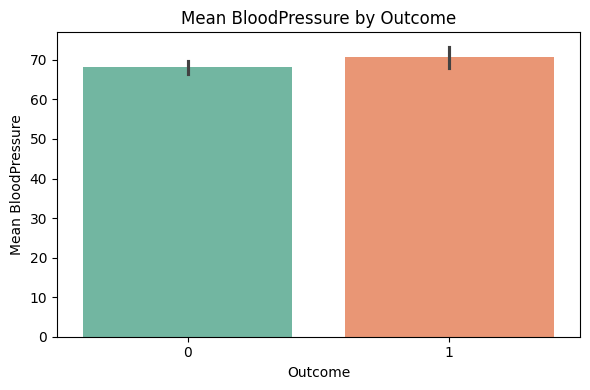

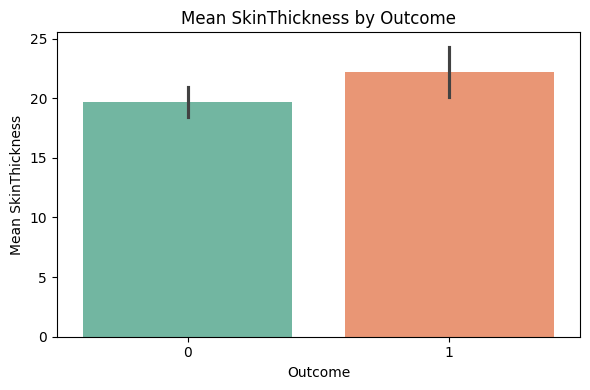

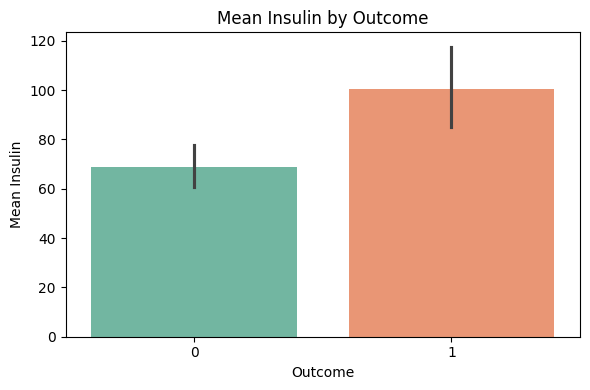

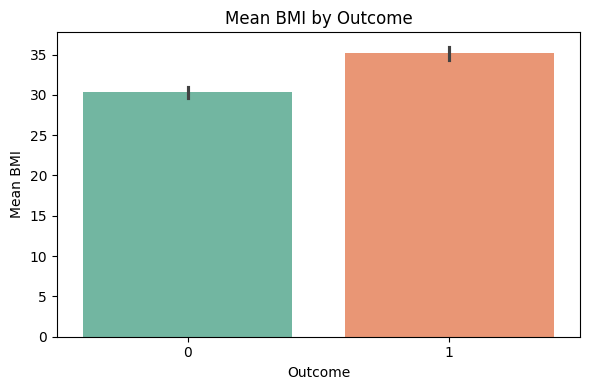

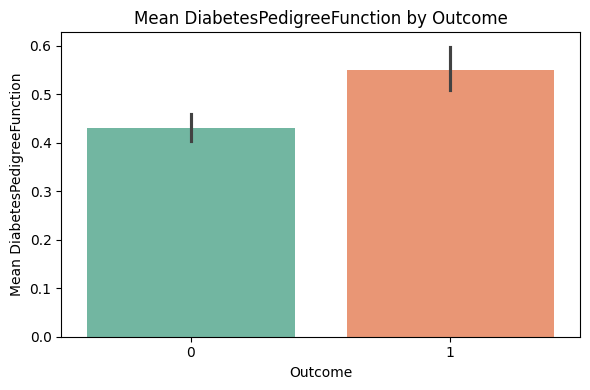

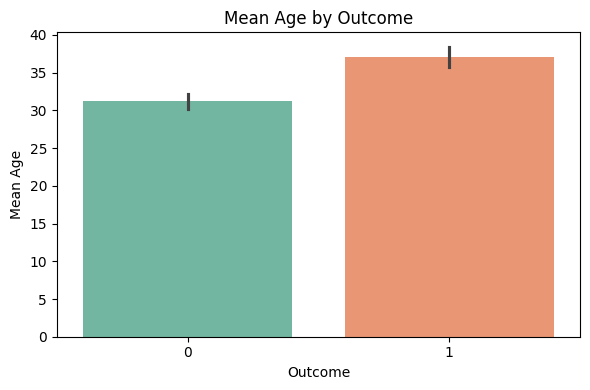

In [12]:
for col in df.columns:
    if col != 'Outcome':
        plt.figure(figsize=(6, 4))
        sns.barplot(x='Outcome', y=col, data=df, palette='Set2')
        plt.title(f'Mean {col} by Outcome')
        plt.xlabel('Outcome')
        plt.ylabel(f'Mean {col}')
        plt.tight_layout()
        plt.show()

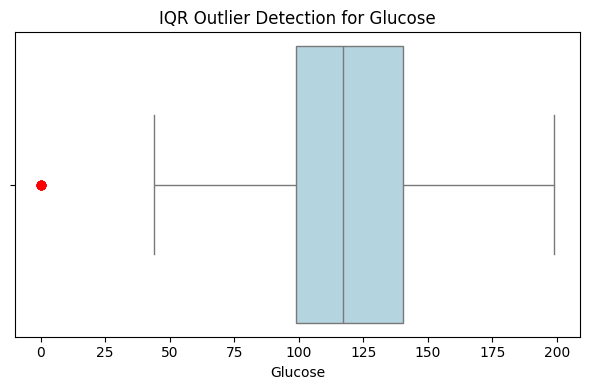

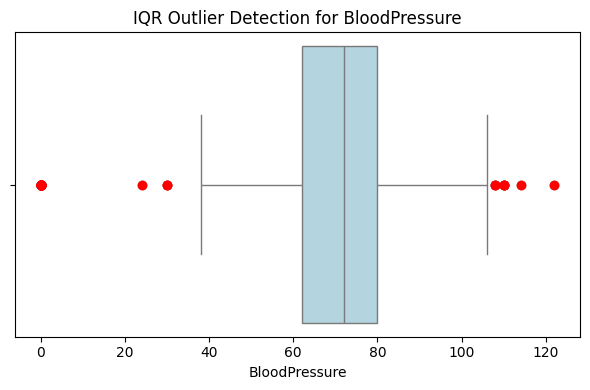

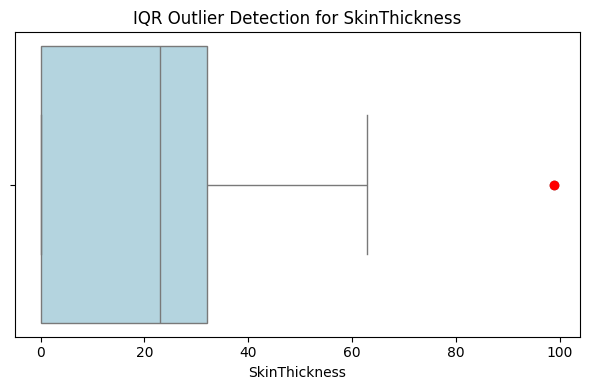

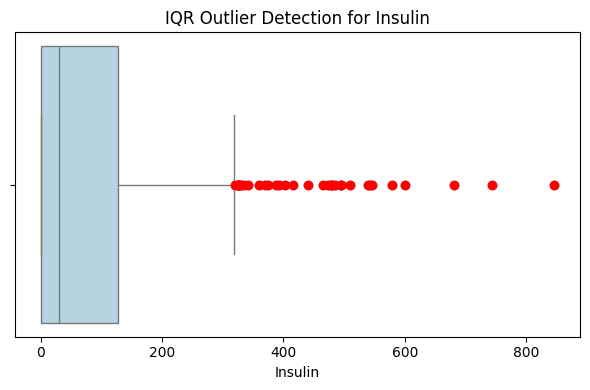

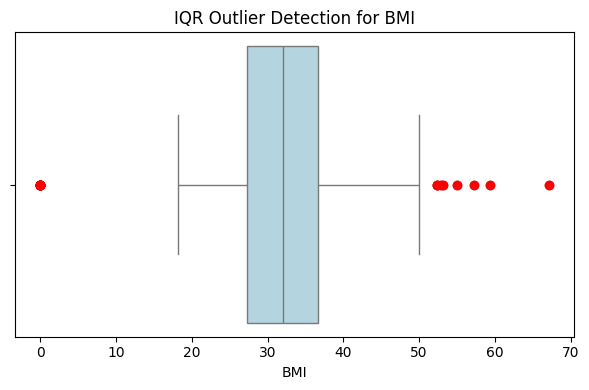

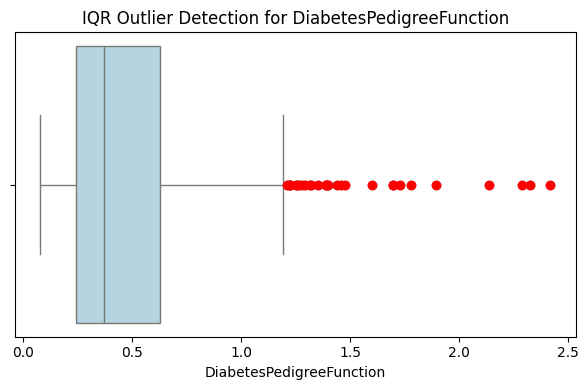

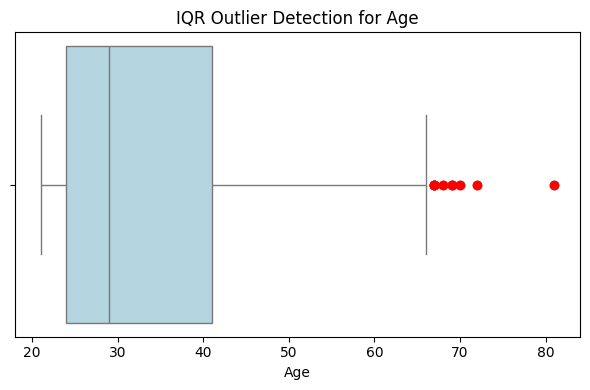

In [13]:
for col in df.columns:
    if col != 'Outcome':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)][col]

        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col], color='lightblue')
        for value in outliers:
            plt.scatter(value, 0, color='red', zorder=5)
        plt.title(f'IQR Outlier Detection for {col}')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

In [14]:
def remove_outliers_iqr(df, exclude_cols=['Outcome']):
    df_clean = df.copy()
    for col in df.columns:
        if col not in exclude_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_cleaned = remove_outliers_iqr(df)

In [15]:
print("Original shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)

Original shape: (768, 8)
After outlier removal: (643, 8)


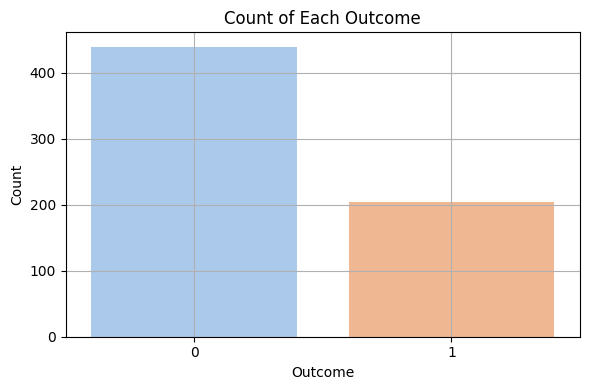

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_cleaned, palette='pastel')
plt.title('Count of Each Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

Scaler.pkl already exists!


  File "C:\Users\Manav\my_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Manav\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Manav\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Manav\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


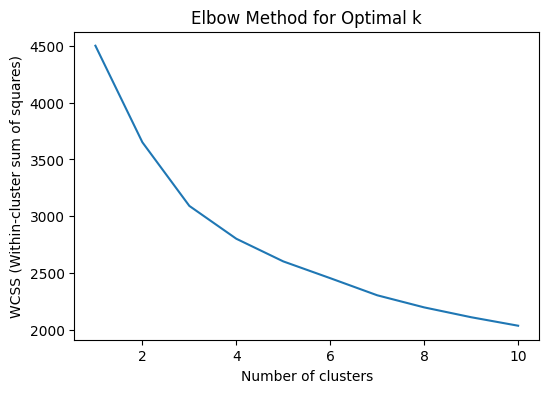

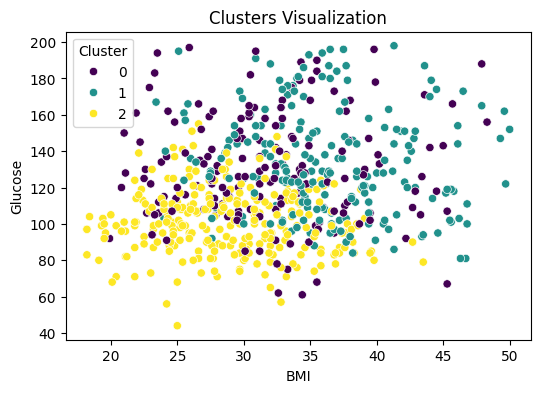

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Check if 'Outcome' exists in df_cleaned
if 'Outcome' not in df_cleaned.columns:
    raise ValueError("'Outcome' column not found in the dataset")

# Prepare data
X = df_cleaned.drop('Outcome', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler to file
scaler_filename = "Scaler.pkl"
if os.path.exists(scaler_filename):
    print(f"{scaler_filename} already exists!")
else:
    with open(scaler_filename, "wb") as f:
        pickle.dump(scaler, f)

# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

# Based on the Elbow method, assuming optimal k = 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df_cleaned['Cluster'] = y_kmeans

# Ensure 'BMI' and 'Glucose' columns exist
if 'BMI' not in df_cleaned.columns or 'Glucose' not in df_cleaned.columns:
    raise ValueError("'BMI' or 'Glucose' column not found in the dataset")

# Visualize clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x='BMI', y='Glucose', hue='Cluster', data=df_cleaned, palette='viridis')
plt.title('Clusters Visualization')
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=['Cluster', 'Outcome'], axis=1)  
y = df_cleaned['Outcome']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set features shape:", X_train.shape)
print("Test set features shape:", X_test.shape)
print("Training set target shape:", y_train.shape)
print("Test set target shape:", y_test.shape)

Training set features shape: (514, 7)
Test set features shape: (129, 7)
Training set target shape: (514,)
Test set target shape: (129,)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression - Accuracy: 0.751937984496124
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        83
           1       0.75      0.46      0.57        46

    accuracy                           0.75       129
   macro avg       0.75      0.69      0.70       129
weighted avg       0.75      0.75      0.73       129



In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest - Accuracy: 0.7131782945736435
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        83
           1       0.64      0.46      0.53        46

    accuracy                           0.71       129
   macro avg       0.69      0.66      0.66       129
weighted avg       0.70      0.71      0.70       129



In [21]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost - Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost - Accuracy: 0.6821705426356589
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        83
           1       0.56      0.50      0.53        46

    accuracy                           0.68       129
   macro avg       0.65      0.64      0.64       129
weighted avg       0.68      0.68      0.68       129



In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.metrics import roc_auc_score

param_dist_log_reg = {
    'C': uniform(loc=0, scale=10),  
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

log_reg = LogisticRegression(random_state=42)

random_search_log_reg = RandomizedSearchCV(estimator=log_reg, param_distributions=param_dist_log_reg, n_iter=100, cv=5, n_jobs=-1, verbose=1)
random_search_log_reg.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", random_search_log_reg.best_params_)
print("Best score for Logistic Regression:", random_search_log_reg.best_score_)

y_pred_log_reg_best = random_search_log_reg.best_estimator_.predict(X_test)

y_pred_prob = random_search_log_reg.best_estimator_.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)

print("ROC-AUC score:", roc_auc)

report = classification_report(y_test, y_pred_log_reg_best)
print("Classification Report:\n", report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for Logistic Regression: {'C': np.float64(6.353823557998246), 'max_iter': 200, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.8035598705501619
ROC-AUC score: 0.7941330539549502
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83        83
           1       0.75      0.46      0.57        46

    accuracy                           0.75       129
   macro avg       0.75      0.69      0.70       129
weighted avg       0.75      0.75      0.73       129



In [32]:
import joblib

# Save the RandomizedSearchCV object (including the best model)
joblib.dump(random_search_log_reg, 'random_search_log_reg_model.pkl')

['random_search_log_reg_model.pkl']

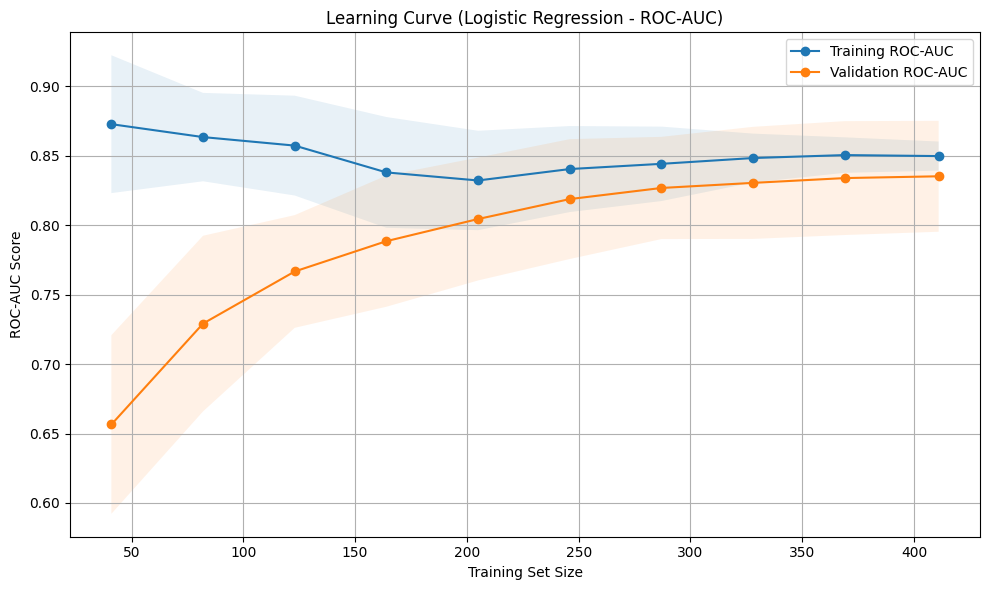

In [23]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    estimator=random_search_log_reg.best_estimator_,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='roc_auc',  
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training ROC-AUC', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)

plt.plot(train_sizes, val_scores_mean, label='Validation ROC-AUC', marker='o')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1)

plt.title("Learning Curve (Logistic Regression - ROC-AUC)")
plt.xlabel("Training Set Size")
plt.ylabel("ROC-AUC Score")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist_rf = {
    'n_estimators': randint(100, 1000),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

rf_model = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=100, cv=5, n_jobs=-1, verbose=1)
random_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best score for Random Forest:", random_search_rf.best_score_)

y_pred_rf_best = random_search_rf.best_estimator_.predict(X_test)

y_pred_prob_rf = random_search_rf.best_estimator_.predict_proba(X_test)[:, 1]

roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print("ROC-AUC score for Random Forest:", roc_auc_rf)

report = classification_report(y_test, y_pred_rf_best)
print("Classification Report:\n", report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for Random Forest: {'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 6, 'n_estimators': 857}
Best score for Random Forest: 0.8055016181229773
ROC-AUC score for Random Forest: 0.7527501309586171
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79        83
           1       0.63      0.41      0.50        46

    accuracy                           0.71       129
   macro avg       0.68      0.64      0.65       129
weighted avg       0.69      0.71      0.69       129



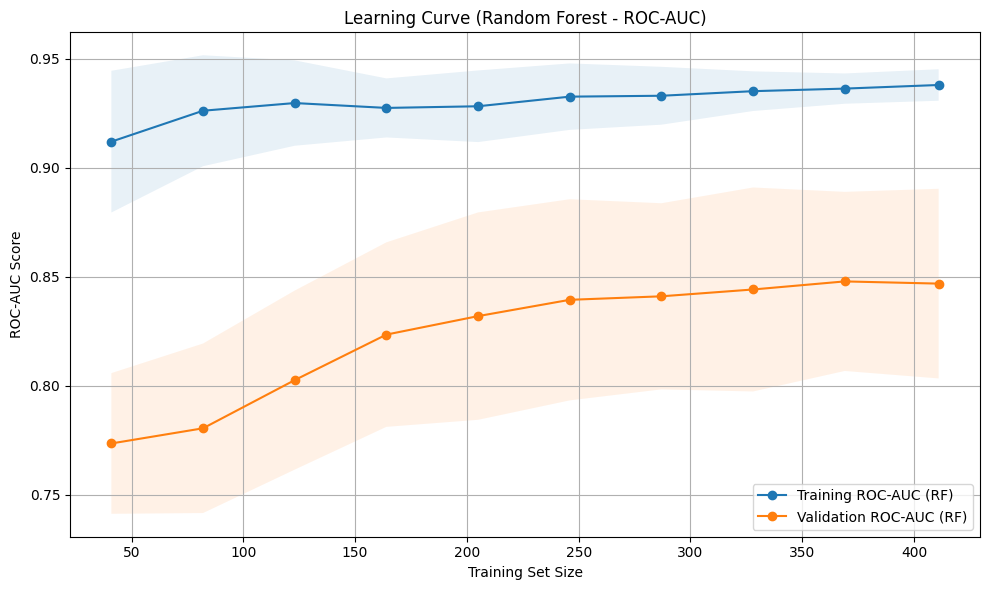

In [25]:
train_sizes_rf, train_scores_rf, val_scores_rf = learning_curve(
    estimator=random_search_rf.best_estimator_,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
train_scores_std_rf = np.std(train_scores_rf, axis=1)
val_scores_mean_rf = np.mean(val_scores_rf, axis=1)
val_scores_std_rf = np.std(val_scores_rf, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf, train_scores_mean_rf, label='Training ROC-AUC (RF)', marker='o')
plt.fill_between(train_sizes_rf, train_scores_mean_rf - train_scores_std_rf,
                 train_scores_mean_rf + train_scores_std_rf, alpha=0.1)

plt.plot(train_sizes_rf, val_scores_mean_rf, label='Validation ROC-AUC (RF)', marker='o')
plt.fill_between(train_sizes_rf, val_scores_mean_rf - val_scores_std_rf,
                 val_scores_mean_rf + val_scores_std_rf, alpha=0.1)

plt.title("Learning Curve (Random Forest - ROC-AUC)")
plt.xlabel("Training Set Size")
plt.ylabel("ROC-AUC Score")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
import xgboost as xgb
from scipy.stats import uniform, randint

param_dist_xgb = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(loc=0.01, scale=0.3),
    'max_depth': randint(3, 15),

    
    'min_child_weight': randint(1, 10),
    'subsample': uniform(loc=0.5, scale=0.5),
    'colsample_bytree': uniform(loc=0.5, scale=0.5)
}

xgb_model = xgb.XGBClassifier(random_state=42)

random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb, n_iter=100, cv=5, n_jobs=-1, verbose=1)
random_search_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost:", random_search_xgb.best_params_)
print("Best score for XGBoost:", random_search_xgb.best_score_)

y_pred_xgb_best = random_search_xgb.best_estimator_.predict(X_test)

y_pred_prob_xgb = random_search_xgb.best_estimator_.predict_proba(X_test)[:, 1]

roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

print("ROC-AUC score for XGBoost:", roc_auc_xgb)

report = classification_report(y_test, y_pred_xgb_best)
print("Classification Report:\n", report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for XGBoost: {'colsample_bytree': np.float64(0.5995679273878272), 'learning_rate': np.float64(0.014856803094096729), 'max_depth': 13, 'min_child_weight': 8, 'n_estimators': 843, 'subsample': np.float64(0.63484412043184)}
Best score for XGBoost: 0.8015800494955263
ROC-AUC score for XGBoost: 0.7574646411733892
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.84      0.78        83
           1       0.59      0.41      0.49        46

    accuracy                           0.69       129
   macro avg       0.66      0.63      0.63       129
weighted avg       0.68      0.69      0.67       129



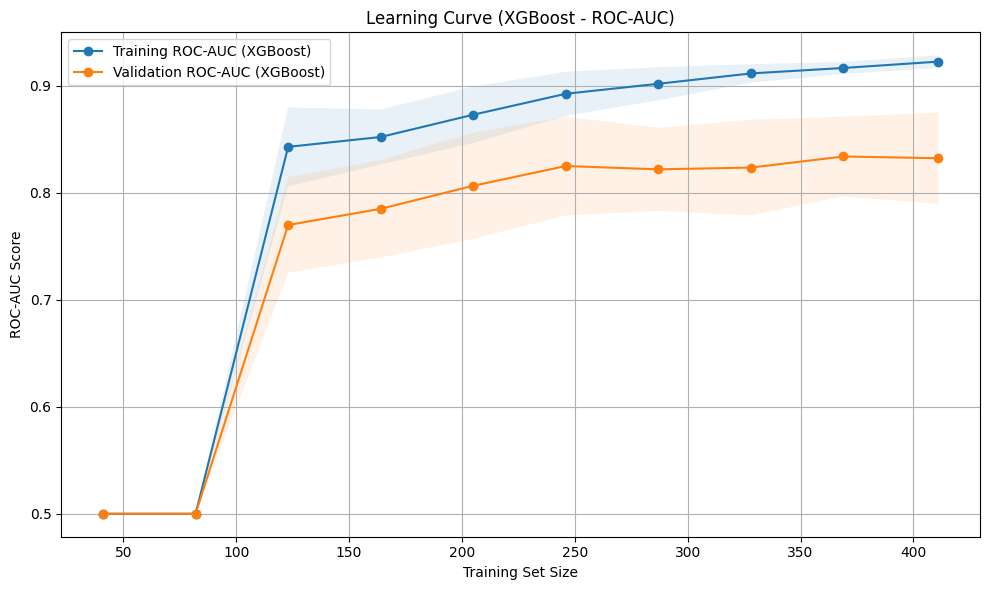

In [27]:
train_sizes_xgb, train_scores_xgb, val_scores_xgb = learning_curve(
    estimator=random_search_xgb.best_estimator_,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_scores_mean_xgb = np.mean(train_scores_xgb, axis=1)
train_scores_std_xgb = np.std(train_scores_xgb, axis=1)
val_scores_mean_xgb = np.mean(val_scores_xgb, axis=1)
val_scores_std_xgb = np.std(val_scores_xgb, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_xgb, train_scores_mean_xgb, label='Training ROC-AUC (XGBoost)', marker='o')
plt.fill_between(train_sizes_xgb, train_scores_mean_xgb - train_scores_std_xgb,
                 train_scores_mean_xgb + train_scores_std_xgb, alpha=0.1)

plt.plot(train_sizes_xgb, val_scores_mean_xgb, label='Validation ROC-AUC (XGBoost)', marker='o')
plt.fill_between(train_sizes_xgb, val_scores_mean_xgb - val_scores_std_xgb,
                 val_scores_mean_xgb + val_scores_std_xgb, alpha=0.1)

plt.title("Learning Curve (XGBoost - ROC-AUC)")
plt.xlabel("Training Set Size")
plt.ylabel("ROC-AUC Score")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
print("ROC-AUC score:", roc_auc)
print("ROC-AUC score for Random Forest:", roc_auc_rf)
print("ROC-AUC score for XGBoost:", roc_auc_xgb)

ROC-AUC score: 0.7941330539549502
ROC-AUC score for Random Forest: 0.7527501309586171
ROC-AUC score for XGBoost: 0.7574646411733892


In [29]:
print("Best ROC-AUC score is for Logistic Regression and is :", roc_auc)

Best ROC-AUC score is for Logistic Regression and is : 0.7941330539549502


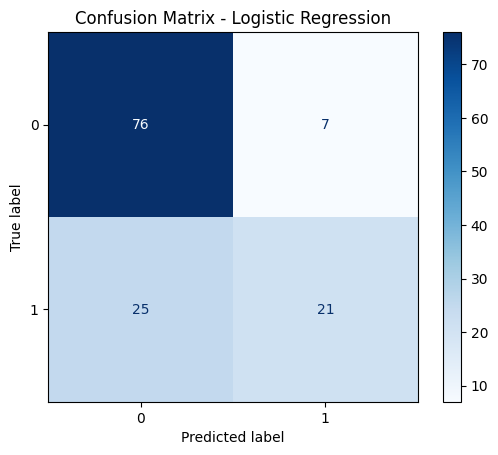

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = random_search_log_reg.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

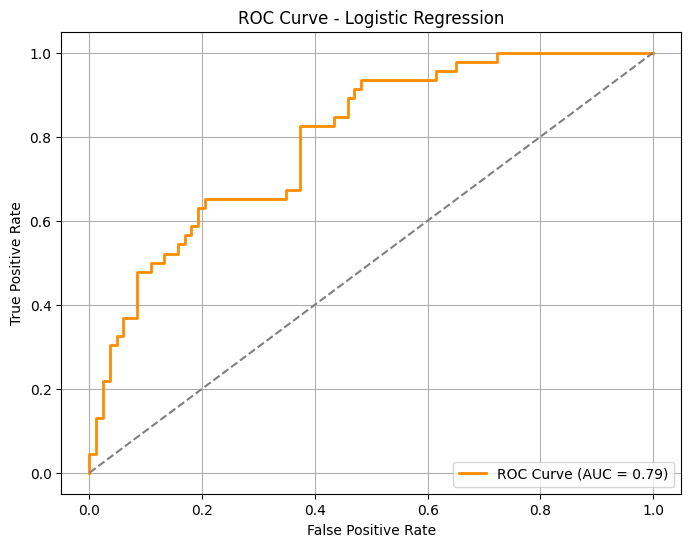

In [31]:
from sklearn.metrics import roc_curve

y_pred_prob = random_search_log_reg.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()